In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math

In [2]:
df = pd.read_csv('./data_proj_414.csv', index_col=0)
df

,X,Y,Potter,Weasley,Granger,Trip,Close,Far
1,2.466284,3.582118,1,0,0,1,0,0
2,5.508336,8.295713,1,0,0,1,0,0
3,6.784481,11.851393,1,0,0,1,0,0
4,7.550499,14.411812,1,0,0,1,0,0
5,10.402096,17.218079,1,0,0,1,0,7
...,...,...,...,...,...,...,...,...
24090,40.615083,74.485727,0,0,1,49,4,16
24091,41.485127,74.335721,0,0,1,49,1,8
24092,41.275887,76.995216,0,0,1,49,1,2
24093,42.176981,76.159014,0,0,1,49,0,1


# Task 1

/Users/billxsy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

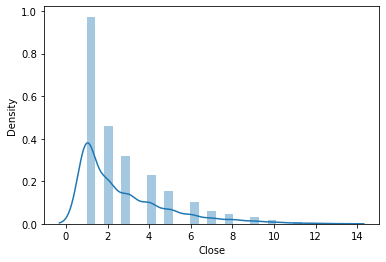

In [3]:
sns.distplot(df.query('Close > 0')['Close'])

In [4]:
np.log(10)

2.302585092994046

/Users/billxsy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

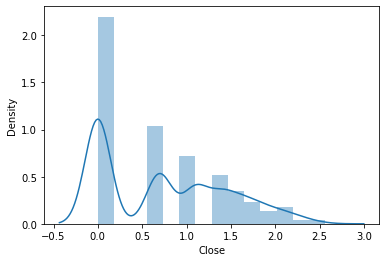

In [5]:
sns.distplot(np.log(df.query('Close > 0')['Close']))

In [6]:
min(df['Close']), max(df['Close'])

(0, 13)

/Users/billxsy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Far', ylabel='Density'>

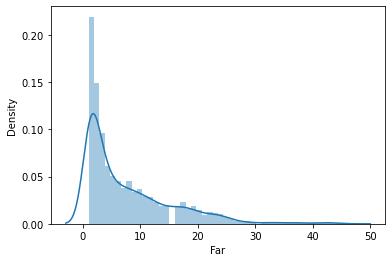

In [7]:
sns.distplot(df.query('Far > 0')['Far'])

/Users/billxsy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Far', ylabel='Density'>

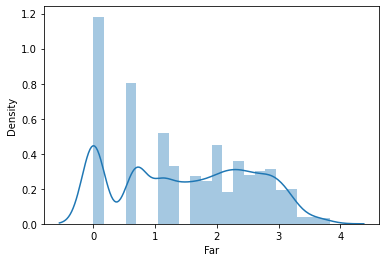

In [8]:
sns.distplot(np.log(df.query('Far > 0')['Far']))

In [9]:
min(df['Far']), max(df['Far'])

(0, 46)

Text(0.5, 1.0, 'Close')

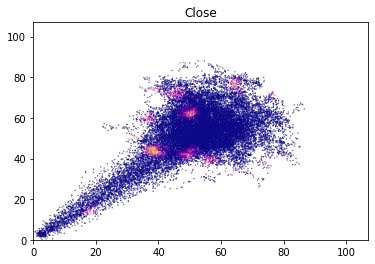

In [10]:
plt.scatter(df['X'], df["Y"], c=df['Close'], s=0.1, cmap='plasma')
plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title('Close')

/Users/billxsy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Close')

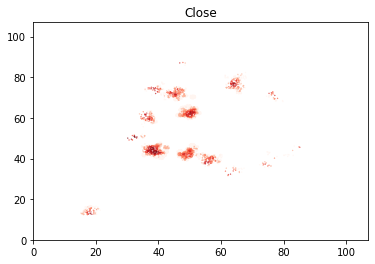

In [11]:
plt.scatter(df['X'], df["Y"], c=np.log(df['Close']), s=0.1, cmap='Reds')
plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title('Close')

Text(0.5, 1.0, 'Far')

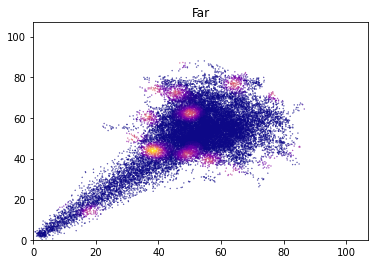

In [12]:
plt.scatter(df['X'], df["Y"], c=df['Far'], s=0.1, cmap='plasma')
plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title('Far')

Text(0.5, 1.0, 'Far')

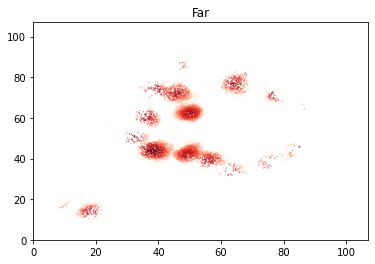

In [16]:
plt.scatter(df['X'], df["Y"], c=np.log(df['Far']), s=0.1, cmap='Reds')
plt.xlim(xmin=0, xmax=107)
plt.ylim(ymin=0, ymax=107)
plt.title('Far')